<a href="https://colab.research.google.com/github/rafaelvalado/Datascience/blob/master/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# Data Analisys Libraries;
import numpy as np
import pandas as pd
 
# Data Visualization Libraries;
import matplotlib.pyplot as plt
import seaborn as sns
 
# To Ignore Warnings;
import warnings
warnings.filterwarnings('ignore')
 
# To Display All Columns
pd.set_option('display.max_columns', None)

In [11]:
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

# Model Selection
from sklearn import model_selection
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, minmax_scale

In [12]:
# Read train and test data with pd.read_csv():
train_data = pd.read_csv('https://github.com/rafaelvalado/Datascience/raw/master/datasets/datasets_2924_4927_train.csv')
test_data = pd.read_csv('https://github.com/rafaelvalado/Datascience/raw/master/datasets/datasets_2924_4927_test.csv')

In [13]:
train = train_data.copy()
test = test_data.copy()

In [14]:
import missingno as msno

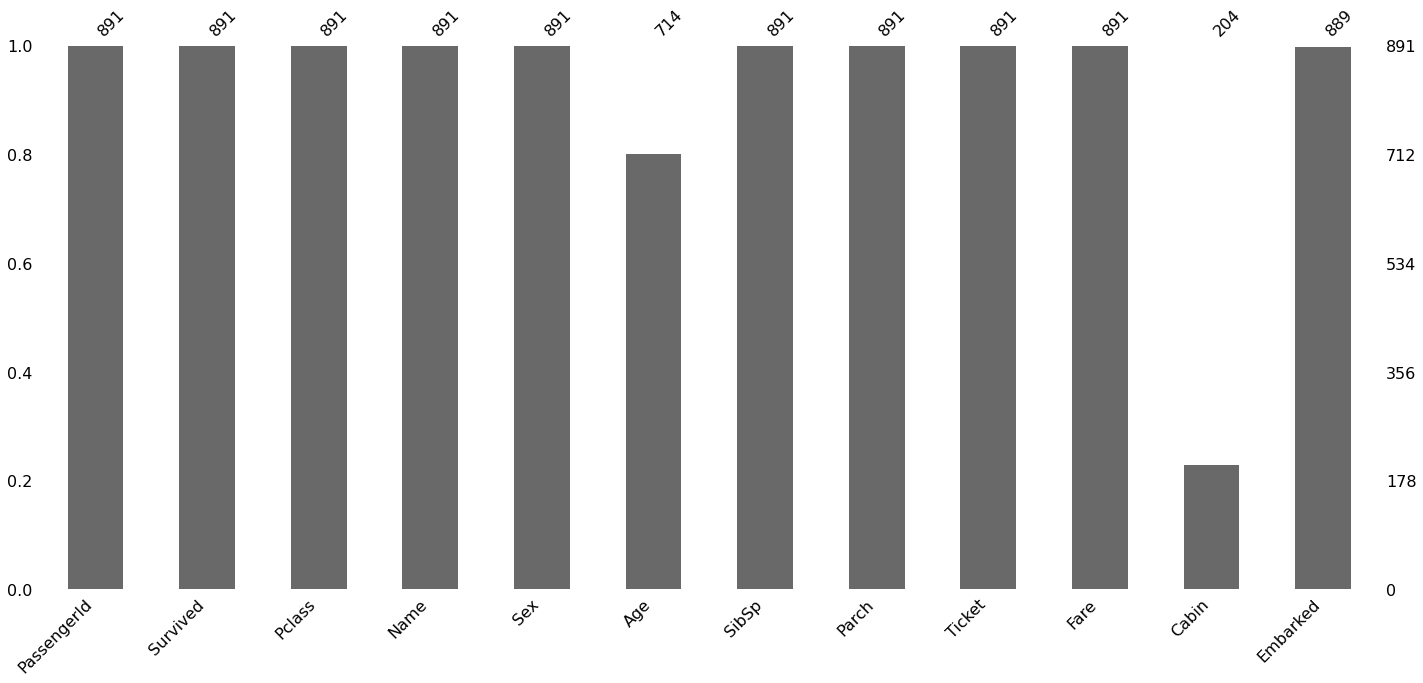

In [15]:
msno.bar(train)

In [16]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [20]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# Analysis and Visualization of Numeric and Categorical Variables

In [22]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


# Clasification of categorical variables;

In [23]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [24]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [25]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [26]:
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [27]:
train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
CA 2144     6
3101295     6
           ..
228414      1
368323      1
3101298     1
2671        1
349218      1
Name: Ticket, Length: 681, dtype: int64

In [28]:
train['Cabin'].value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
D              3
F33            3
              ..
C111           1
D6             1
C104           1
F G63          1
A32            1
Name: Cabin, Length: 147, dtype: int64

In [29]:
train['Embarked'].value_counts

<bound method IndexOpsMixin.value_counts of 0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object>

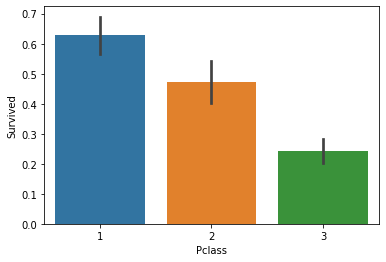

In [30]:
sns.barplot(x='Pclass', y='Survived', data=train)

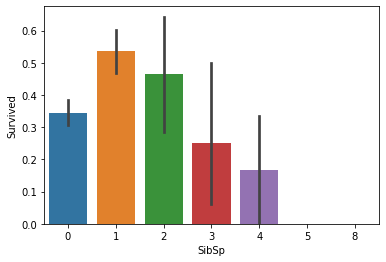

In [31]:
sns.barplot(x='SibSp', y='Survived', data=train)

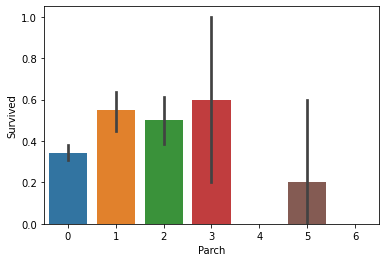

In [32]:
sns.barplot(x='Parch', y='Survived', data=train)

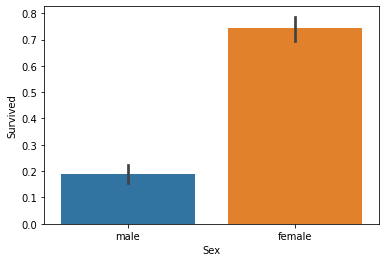

In [33]:
sns.barplot(x='Sex', y='Survived', data=train)

In [34]:
#data preparation

In [35]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [37]:
train = train.drop(['Ticket'], axis=1)
test = test.drop(['Ticket'], axis=1)


In [38]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [39]:
train.describe([0.10,0.25, 0.50, 0.75, 0.90, 0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,99%,max
PassengerId,891.0,446.000000,257.353842,1.00,90.00,223.5000,446.0000,668.5,802.0000,882.10000,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.00,0.0000,0.0000,1.0,1.0000,1.00000,1.0000
Pclass,891.0,2.308642,0.836071,1.00,1.00,2.0000,3.0000,3.0,3.0000,3.00000,3.0000
Age,714.0,29.699118,14.526497,0.42,14.00,20.1250,28.0000,38.0,50.0000,65.87000,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.00,0.0000,0.0000,1.0,1.0000,5.00000,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.00,0.0000,0.0000,0.0,2.0000,4.00000,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.55,7.9104,14.4542,31.0,77.9583,249.00622,512.3292


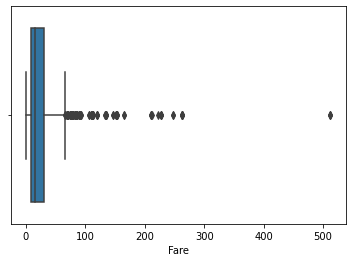

In [40]:
sns.boxplot(x= train['Fare'])

In [41]:
Q1 = train['Fare'].quantile(0.25)
Q3 = train['Fare'].quantile(0.75)
IQR = Q3 - Q1

In [42]:
lower_limit = Q1-1.5*IQR
lower_limit

-26.724

In [43]:
upper_limit = Q3 + 1.5*IQR
upper_limit

65.6344

In [44]:
train['Fare'] > (upper_limit)

0      False
1       True
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Fare, Length: 891, dtype: bool

In [45]:
train.sort_values('Fare', ascending= False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,512.3292,B101,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,512.3292,B51 B53 B55,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,263.0000,C23 C25 C27,S


In [46]:
train.sort_values('Fare', ascending=False).tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,0.0,NaN,S
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,0.0,NaN,S
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,0.0,NaN,S
674,675,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,0.0,NaN,S


In [47]:
train['Fare'] = train['Fare'].replace(512.3292, 312)

In [48]:
train.sort_values('Fare', ascending=False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,312.0,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,312.0,B101,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,312.0,B51 B53 B55,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,263.0,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,263.0,C23 C25 C27,S


In [49]:
train.sort_values('Fare', ascending=False).tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,0.0,NaN,S
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,0.0,NaN,S
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,0.0,NaN,S
674,675,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,0.0,NaN,S


In [50]:
test.sort_values('Fare', ascending=False)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
343,1235,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,512.3292,B51 B53 B55,C
53,945,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,263.0000,C23 C25 C27,S
69,961,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,263.0000,C23 C25 C27,S
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,262.3750,B57 B59 B63 B66,C
142,1034,1,"Ryerson, Mr. Arthur Larned",male,61.0,1,3,262.3750,B57 B59 B63 B66,C
...,...,...,...,...,...,...,...,...,...,...
133,1025,3,"Thomas, Mr. Charles P",male,NaN,1,0,6.4375,NaN,C
21,913,3,"Olsen, Master. Artur Karl",male,9.0,0,1,3.1708,NaN,S
266,1158,1,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,0.0000,NaN,S
372,1264,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,0.0000,B52 B54 B56,S


In [51]:
test["Fare"] = test["Fare"].replace(512.3292, 312)

In [52]:
test.sort_values(["Fare"], ascending=False)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
343,1235,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,312.0000,B51 B53 B55,C
53,945,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,263.0000,C23 C25 C27,S
69,961,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,263.0000,C23 C25 C27,S
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,262.3750,B57 B59 B63 B66,C
142,1034,1,"Ryerson, Mr. Arthur Larned",male,61.0,1,3,262.3750,B57 B59 B63 B66,C
...,...,...,...,...,...,...,...,...,...,...
133,1025,3,"Thomas, Mr. Charles P",male,NaN,1,0,6.4375,NaN,C
21,913,3,"Olsen, Master. Artur Karl",male,9.0,0,1,3.1708,NaN,S
266,1158,1,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,0.0000,NaN,S
372,1264,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,0.0000,B52 B54 B56,S


In [53]:
#Missing Value Treatment

In [54]:
train.isnull().values.any()

True

In [55]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [56]:
train["Age"].fillna(0, inplace = True)

In [57]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [58]:
train["Cabin"].fillna(0, inplace = True)

In [59]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [60]:
100 * train.isnull().sum() / len(train)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Fare           0.000000
Cabin          0.000000
Embarked       0.224467
dtype: float64

In [61]:
#Age

In [62]:
train["Age"] = train["Age"].fillna(train["Age"].mean())

In [63]:
test["Age"] = test["Age"].fillna(test["Age"].mean())

In [64]:
train.isnull().values.any()

True

In [65]:
test.isnull().values.any()

True

In [66]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [67]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [68]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [69]:
test["Embarked"].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [70]:
test["Embarked"] = test["Embarked"].fillna("S")

In [71]:
train["Embarked"] = train["Embarked"].fillna("S")

In [72]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [73]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [74]:
#Fare

In [75]:
test[test["Fare"].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,NaN,NaN,S


In [76]:
test[["Pclass", "Fare"]].groupby("Pclass").mean()

,Fare
Pclass,
1,92.408062
2,22.202104
3,12.459678


In [77]:
test["Fare"] = test["Fare"].fillna(12)

In [78]:
test["Fare"].isnull().sum()

0

In [79]:
#Cabin

In [80]:
train["CabinBool"] = train["Cabin"].isnull().astype('int')

In [81]:
test["CabinBoll"] = test["Cabin"].isnull().astype('int')

In [82]:
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)

In [83]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0


In [84]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBoll
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,1


In [85]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
CabinBool      0
dtype: int64

In [86]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
CabinBoll      0
dtype: int64

In [87]:
#variables transformation

In [88]:
#Embarked

In [89]:
embarked_mapping = {"S": 1, "C": 2, "Q": 3}

In [90]:
train['Embarked'] = train['Embarked'].map(embarked_mapping)

In [91]:
test['Embarked'] = test['Embarked'].map(embarked_mapping)

In [92]:
#sex

In [93]:
from sklearn import preprocessing

lbe = preprocessing.LabelEncoder()

train['Sex'] = lbe.fit_transform(train['Sex'])
test['Sex'] = lbe.fit_transform(test['Sex'])

In [94]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,1,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,1,0


In [95]:
#Name - title

In [96]:
train['Title'] = train['Name'].str.extract('([A-Za-z]+)\.', expand = False)
test['Title'] = test['Name'].str.extract('([A-Za-z]+)\.', expand = False)

In [97]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,1,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,2,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,1,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,1,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,1,0,Mr


In [98]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Don           1
Mme           1
Capt          1
Lady          1
Ms            1
Jonkheer      1
Countess      1
Sir           1
Name: Title, dtype: int64

In [99]:
train['Title'] = train['Title'].replace(['Lady', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')

train['Title'] = train['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')

train['Title'] = train['Title'].replace('Mlle', 'Miss')

train['Title'] = train['Title'].replace('Ms', 'Miss')

train['Title'] = train['Title'].replace('Mme', 'Mrs')

In [100]:
test['Title'] = test['Title'].replace(['Lady', 'Capt', 'Col', 'Don', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')

test['Title'] = test['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')

test['Title'] = test['Title'].replace('Mlle', 'Miss')

test['Title'] = test['Title'].replace('Ms', 'Miss')

test['Title'] = test['Title'].replace('Mme', 'Mrs')

In [101]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBoll,Title
0,892,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,3,1,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,1,1,Mrs
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,3,1,Mr
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,1,1,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,1,1,Mrs


In [102]:
train[['Title', 'PassengerId']].groupby('Title').count()

,PassengerId
Title,
Master,40
Miss,185
Mr,517
Mrs,126
Rare,21
Royal,2


In [103]:
train[['Title', 'Survived']].groupby(['Title'], as_index = False).agg({'count', 'mean'})

Survived          
          count      mean
Title                    
Master       40  0.575000
Miss        185  0.702703
Mr          517  0.156673
Mrs         126  0.793651
Rare         21  0.285714
Royal         2  1.000000

In [104]:
title_mapping = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Royal':5, 'Rare':5}
train['Title'] = train['Title'].map(title_mapping)

In [105]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
CabinBool      0
Title          0
dtype: int64

In [106]:
test['Title'] = test['Title'].map(title_mapping)

In [107]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,2,0,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,1,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,1,0,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,1,0,1


In [108]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBoll,Title
0,892,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,3,1,1.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,1,1,3.0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,3,1,1.0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,1,1,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,1,1,3.0


In [109]:
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

In [110]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool,Title
0,1,0,3,1,22.0,1,0,7.2500,1,0,1
1,2,1,1,0,38.0,1,0,71.2833,2,0,3
2,3,1,3,0,26.0,0,0,7.9250,1,0,2
3,4,1,1,0,35.0,1,0,53.1000,1,0,3
4,5,0,3,1,35.0,0,0,8.0500,1,0,1


In [111]:
#age group

In [112]:
bins = [0, 5, 12, 18, 24, 35, 60, np.inf]
mylabels = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']

train['AgeGroup'] = pd.cut(train['Age'], bins, labels = mylabels)
test['AgeGroup'] = pd.cut(test['Age'], bins, labels = mylabels)

In [113]:
age_mapping = {'Baby':1, 'Child':2, 'Teenager':3, 'Student':4, 'Young Adult':5, 'Adult':6, 'Senior':7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

In [114]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool,Title,AgeGroup
0,1,0,3,1,22.0,1,0,7.2500,1,0,1,4
1,2,1,1,0,38.0,1,0,71.2833,2,0,3,6
2,3,1,3,0,26.0,0,0,7.9250,1,0,2,5
3,4,1,1,0,35.0,1,0,53.1000,1,0,3,5
4,5,0,3,1,35.0,0,0,8.0500,1,0,1,5


In [115]:
train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)

In [116]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,CabinBool,Title,AgeGroup
0,1,0,3,1,1,0,7.2500,1,0,1,4
1,2,1,1,0,1,0,71.2833,2,0,3,6
2,3,1,3,0,0,0,7.9250,1,0,2,5
3,4,1,1,0,1,0,53.1000,1,0,3,5
4,5,0,3,1,0,0,8.0500,1,0,1,5


In [117]:
train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])

In [118]:
train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

In [119]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,CabinBool,Title,AgeGroup,FareBand
0,1,0,3,1,1,0,1,0,1,4,1
1,2,1,1,0,1,0,2,0,3,6,4
2,3,1,3,0,0,0,1,0,2,5,2
3,4,1,1,0,1,0,1,0,3,5,4
4,5,0,3,1,0,0,1,0,1,5,2


In [120]:
# family size

In [121]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,CabinBool,Title,AgeGroup,FareBand
0,1,0,3,1,1,0,1,0,1,4,1
1,2,1,1,0,1,0,2,0,3,6,4
2,3,1,3,0,0,0,1,0,2,5,2
3,4,1,1,0,1,0,1,0,3,5,4
4,5,0,3,1,0,0,1,0,1,5,2


In [122]:
train['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1

In [123]:
test['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

In [124]:
train['Single'] = train['FamilySize'].map(lambda s: 1 if s == 1 else 0)
train['SmallFam'] = train['FamilySize'].map(lambda s: 1 if s == 2 else 0)
train['MedFam'] = train['FamilySize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
train['LargeFam'] = train['FamilySize'].map(lambda s: 1 if s >= 5 else 0)

In [125]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,CabinBool,Title,AgeGroup,FareBand,FamilySize,Single,SmallFam,MedFam,LargeFam
0,1,0,3,1,1,0,1,0,1,4,1,2,0,1,0,0
1,2,1,1,0,1,0,2,0,3,6,4,2,0,1,0,0
2,3,1,3,0,0,0,1,0,2,5,2,1,1,0,0,0
3,4,1,1,0,1,0,1,0,3,5,4,2,0,1,0,0
4,5,0,3,1,0,0,1,0,1,5,2,1,1,0,0,0


In [126]:
test['Single'] = test['FamilySize'].map(lambda s: 1 if s == 1 else 0)
test['SmallFam'] = test['FamilySize'].map(lambda s: 1 if s == 2 else 0)
test['MedFam'] = test['FamilySize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
test['LargeFam'] = test['FamilySize'].map(lambda s: 1 if s >= 5 else 0)

In [127]:
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,CabinBoll,Title,AgeGroup,FareBand,FamilySize,Single,SmallFam,MedFam,LargeFam
0,892,3,1,0,0,3,1,1.0,5,1,1,1,0,0,0
1,893,3,0,1,0,1,1,3.0,6,1,2,0,1,0,0
2,894,2,1,0,0,3,1,1.0,7,2,1,1,0,0,0
3,895,3,1,0,0,1,1,1.0,5,2,1,1,0,0,0
4,896,3,0,1,1,1,1,3.0,4,2,3,0,0,1,0


In [128]:
# embarked & title

In [129]:
train = pd.get_dummies(train, columns = ['Title'])
train = pd.get_dummies(train, columns = ['Embarked'], prefix = 'Em')

In [130]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,CabinBool,AgeGroup,FareBand,FamilySize,Single,SmallFam,MedFam,LargeFam,Title_1,Title_2,Title_3,Title_4,Title_5,Em_1,Em_2,Em_3
0,1,0,3,1,1,0,0,4,1,2,0,1,0,0,1,0,0,0,0,1,0,0
1,2,1,1,0,1,0,0,6,4,2,0,1,0,0,0,0,1,0,0,0,1,0
2,3,1,3,0,0,0,0,5,2,1,1,0,0,0,0,1,0,0,0,1,0,0
3,4,1,1,0,1,0,0,5,4,2,0,1,0,0,0,0,1,0,0,1,0,0
4,5,0,3,1,0,0,0,5,2,1,1,0,0,0,1,0,0,0,0,1,0,0


In [131]:
test = pd.get_dummies(test, columns = ['Title'])
test = pd.get_dummies(test, columns = ['Embarked'], prefix = 'Em')

In [132]:
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,CabinBoll,AgeGroup,FareBand,FamilySize,Single,SmallFam,MedFam,LargeFam,Title_1.0,Title_2.0,Title_3.0,Title_4.0,Title_5.0,Em_1,Em_2,Em_3
0,892,3,1,0,0,1,5,1,1,1,0,0,0,1,0,0,0,0,0,0,1
1,893,3,0,1,0,1,6,1,2,0,1,0,0,0,0,1,0,0,1,0,0
2,894,2,1,0,0,1,7,2,1,1,0,0,0,1,0,0,0,0,0,0,1
3,895,3,1,0,0,1,5,2,1,1,0,0,0,1,0,0,0,0,1,0,0
4,896,3,0,1,1,1,4,2,3,0,0,1,0,0,0,1,0,0,1,0,0


In [133]:
train.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [134]:
#Pclass

In [135]:
train['Pclass'] = train['Pclass'].astype('category')
train = pd.get_dummies(train, columns = ['Pclass'], prefix = 'Pc')

In [136]:
test['Pclass'] = test['Pclass'].astype('category')
test = pd.get_dummies(test, columns = ['Pclass'], prefix = 'Pc')

In [137]:
train.head()

,PassengerId,Survived,Sex,SibSp,Parch,CabinBool,AgeGroup,FareBand,FamilySize,Single,SmallFam,MedFam,LargeFam,Title_1,Title_2,Title_3,Title_4,Title_5,Em_1,Em_2,Em_3,Pc_1,Pc_2,Pc_3
0,1,0,1,1,0,0,4,1,2,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1
1,2,1,0,1,0,0,6,4,2,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0
2,3,1,0,0,0,0,5,2,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1
3,4,1,0,1,0,0,5,4,2,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
4,5,0,1,0,0,0,5,2,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1


In [138]:
test.head()

,PassengerId,Sex,SibSp,Parch,CabinBoll,AgeGroup,FareBand,FamilySize,Single,SmallFam,MedFam,LargeFam,Title_1.0,Title_2.0,Title_3.0,Title_4.0,Title_5.0,Em_1,Em_2,Em_3,Pc_1,Pc_2,Pc_3
0,892,1,0,0,1,5,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1
1,893,0,1,0,1,6,1,2,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1
2,894,1,0,0,1,7,2,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0
3,895,1,0,0,1,5,2,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1
4,896,0,1,1,1,4,2,3,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1


In [139]:
#modeling, evaluation and model tuning
# spliting the train data

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x = train.drop(['Survived', 'PassengerId'], axis = 1)
y = train['Survived']

In [141]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.20, random_state = 17)

In [142]:
x_train.shape

(712, 22)

In [143]:
x_train.head()

,Sex,SibSp,Parch,CabinBool,AgeGroup,FareBand,FamilySize,Single,SmallFam,MedFam,LargeFam,Title_1,Title_2,Title_3,Title_4,Title_5,Em_1,Em_2,Em_3,Pc_1,Pc_2,Pc_3
873,1,0,0,0,6,2,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1
828,1,0,0,0,NaN,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1
99,1,1,0,0,5,3,2,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0
523,0,0,1,0,6,4,2,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0
132,0,1,0,0,6,3,2,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1


In [144]:
x_val.shape

(179, 22)

In [145]:
x_val.head()

,Sex,SibSp,Parch,CabinBool,AgeGroup,FareBand,FamilySize,Single,SmallFam,MedFam,LargeFam,Title_1,Title_2,Title_3,Title_4,Title_5,Em_1,Em_2,Em_3,Pc_1,Pc_2,Pc_3
890,1,0,0,0,5,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1
498,0,1,2,0,5,4,4,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
664,1,1,0,0,4,2,2,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1
261,1,4,2,0,1,4,7,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1
716,0,0,0,0,6,4,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0


In [146]:
y_train.shape

(712,)

In [147]:
y_train.head()

873    0
828    1
99     0
523    1
132    0
Name: Survived, dtype: int64

In [148]:
y_val.head()

890    0
498    0
664    1
261    1
716    1
Name: Survived, dtype: int64